In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from utils.visualization_utils import perc, SetPlotRC, ApplyFont

import warnings
warnings.filterwarnings("ignore")

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

In [3]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Abortion_and_Crime.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Abortion_and_Crime.pkl")
df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Abortion_and_Crime.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_Abortion_and_Crime_V2.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_Abortion_and_Crime_V2.pkl")

In [4]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Abortion_and_Crime.pkl")
df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy["Seed"] < 300]
df_kernel_alternative_proxy.to_pickle("../Results/Kernel_Alternative_Proxy_Abortion_and_Crime.pkl")

df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Abortion_and_Crime.pkl")
df_kernel_negative_control = df_kernel_negative_control.loc[df_kernel_negative_control["Seed"] < 300]
df_kernel_negative_control.to_pickle("../Results/Kernel_Negative_Control_Abortion_and_Crime.pkl")

df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Abortion_and_Crime.pkl")
df_PKIPW = df_PKIPW.loc[df_PKIPW["Seed"] < 300]
df_PKIPW.to_pickle("../Results/PKIPW_Abortion_and_Crime.pkl")

df_PMMR = pd.read_pickle(r"../Results/PMMR_Abortion_and_Crime_V2.pkl")
df_PMMR = df_PMMR.loc[df_PMMR["Seed"] < 300]
df_PMMR.to_pickle("../Results/PMMR_Abortion_and_Crime_V2.pkl")

df_KPV = pd.read_pickle(r"../Results/KPV_Abortion_and_Crime_V2.pkl")
df_KPV = df_KPV.loc[df_KPV["Seed"] < 300]
df_KPV.to_pickle("../Results/KPV_Abortion_and_Crime_V2.pkl")

In [5]:
df_kernel_alternative_proxy.shape, df_kernel_negative_control.shape, df_PKIPW.shape, df_PMMR.shape, df_KPV.shape

((120, 12), (60, 8), (60, 8), (960, 9), (60, 7))

In [6]:
df_kernel_alternative_proxy_results_wrt_data_scale = pd.DataFrame(columns = ['Algorithm', 'scale_data', 'eta_parameter', 'sigma_square', 'kernel', 'stage1_perc', 'Causal_MSE_mean', 'Causal_MSE_std'])

for scale_data in df_kernel_alternative_proxy["scale_data"].unique():
    for eta_parameter in df_kernel_alternative_proxy["eta_parameter"].unique():
        for kernel_ in df_kernel_alternative_proxy["kernel"].unique():
            for stage1_perc_ in df_kernel_alternative_proxy["stage1_perc"].unique():
                for sigma_sq in df_kernel_alternative_proxy["sigma_square"].unique():
                    df_scale = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['eta_parameter'] == eta_parameter) & (df_kernel_alternative_proxy['scale_data'] == scale_data) & (df_kernel_alternative_proxy['kernel'] == kernel_) & (df_kernel_alternative_proxy['stage1_perc'] == stage1_perc_) & (df_kernel_alternative_proxy['sigma_square'] == sigma_sq)]
            
                    df_scale_dict = {
                        "Algorithm" : "Kernel_Alternative_Proxy",
                        "eta_parameter" : eta_parameter,
                        "sigma_square" : sigma_sq, 
                        "scale_data" : scale_data,
                        "kernel" : kernel_,
                        "stage1_perc" : stage1_perc_,
                        "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                        "Causal_MSE_std" : df_scale["Causal_MSE"].std(),
                    }
                
                    df_kernel_alternative_proxy_results_wrt_data_scale = pd.concat([df_kernel_alternative_proxy_results_wrt_data_scale, pd.DataFrame([df_scale_dict])], ignore_index = True)

df_kernel_alternative_proxy = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy["kernel"] == "RBF") & (df_kernel_alternative_proxy["stage1_perc"] == 0.5) & (df_kernel_alternative_proxy["sigma_square"] == 1.)]
df_kernel_alternative_proxy_results_wrt_data_scale = df_kernel_alternative_proxy_results_wrt_data_scale.loc[~df_kernel_alternative_proxy_results_wrt_data_scale["Causal_MSE_mean"].isnull()]
df_kernel_alternative_proxy_results_wrt_data_scale

,Algorithm,scale_data,eta_parameter,sigma_square,kernel,stage1_perc,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Alternative_Proxy,True,learned,0.0,RBF,0.5,0.035864,0.023370
1,Kernel_Alternative_Proxy,True,learned,1.0,RBF,0.5,0.026535,0.018188
2,Kernel_Alternative_Proxy,True,learned,2.0,RBF,0.5,0.020890,0.012877
3,Kernel_Alternative_Proxy,True,learned,3.0,RBF,0.5,0.019227,0.007609


In [7]:
df_kernel_negative_control_results_wrt_scale_data = pd.DataFrame(columns = ["Algorithm", "scale_data", "Causal_MSE_mean", "Causal_MSE_std"])

for scale_data in df_kernel_negative_control["scale_data"].unique():
        df_scale_data = df_kernel_negative_control.loc[(df_kernel_negative_control["scale_data"] == scale_data)]
        df_scale_data_dict = { "Algorithm" : "Kernel_Negative_Control",
                               "scale_data" : scale_data,
                               "Causal_MSE_mean" : df_scale_data["Causal_MSE"].mean(),
                               "Causal_MSE_std" : df_scale_data["Causal_MSE"].std()}
        df_kernel_negative_control_results_wrt_scale_data = pd.concat([df_kernel_negative_control_results_wrt_scale_data, pd.DataFrame([df_scale_data_dict])], ignore_index = True)

df_kernel_negative_control_results_wrt_scale_data

,Algorithm,scale_data,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Negative_Control,True,0.027124,0.009490
1,Kernel_Negative_Control,False,0.023589,0.008877


In [8]:
df_PKIPW_results_wrt_scale_data = pd.DataFrame(columns = ['Algorithm', 'scale_data', 'Causal_MSE_mean', 'Causal_MSE_std'])

for scale_data in df_PKIPW["scale_data"].unique():
        df_scale_data = df_PKIPW.loc[(df_PKIPW['scale_data'] == scale_data)]

        df_scale_data_dict = {
            "Algorithm" : "PKIPW",
            "scale_data" : scale_data,
            "Causal_MSE_mean" : df_scale_data["Causal_MSE"].mean(),
            "Causal_MSE_std" : df_scale_data["Causal_MSE"].std(),
        }

        df_PKIPW_results_wrt_scale_data = pd.concat([df_PKIPW_results_wrt_scale_data, pd.DataFrame([df_scale_data_dict])], ignore_index = True)

df_PKIPW_results_wrt_scale_data

,Algorithm,scale_data,Causal_MSE_mean,Causal_MSE_std
0,PKIPW,True,0.047793,0.031807
1,PKIPW,False,0.029555,0.019265


In [9]:
df_PMMR_results_wrt_lam = pd.DataFrame(columns = ["Algorithm", "lam1", "lam2", "scale_data", "Causal_MSE_mean", "Causal_MSE_std"])

for lam1_ in df_PMMR["lam1"].unique():
    for lam2_ in df_PMMR["lam2"].unique():
        for scale_data in df_PMMR["scale_data"].unique():
            df_lam = df_PMMR.loc[(df_PMMR["lam1"] == lam1_) & (df_PMMR["lam2"] == lam2_) & (df_PMMR["scale_data"] == scale_data)]
            df_lam_dict = {
                "Algorithm": "PMMR",
                "lam1": lam1_,
                "lam2": lam2_,
                "scale_data" : scale_data,
                "Causal_MSE_mean" : df_lam["Causal_MSE"].mean(),
                "Causal_MSE_std" : df_lam["Causal_MSE"].std(),
            }
    
            df_PMMR_results_wrt_lam = pd.concat([df_PMMR_results_wrt_lam, pd.DataFrame([df_lam_dict])], ignore_index = True)

df_PMMR = df_PMMR.loc[(df_PMMR["lam1"] == 1e-2) & (df_PMMR["lam2"] == 1e-2)]

df_PMMR_results_wrt_lam

,Algorithm,lam1,lam2,scale_data,Causal_MSE_mean,Causal_MSE_std
0,PMMR,0.00001,0.00001,True,0.025814,0.015221
1,PMMR,0.00001,0.00001,False,0.031097,0.025982
2,PMMR,0.00001,0.00010,True,0.025814,0.015221
3,PMMR,0.00001,0.00010,False,0.031097,0.025982
4,PMMR,0.00001,0.00100,True,0.025814,0.015221
5,PMMR,0.00001,0.00100,False,0.031097,0.025982
6,PMMR,0.00001,0.01000,True,0.025814,0.015221
7,PMMR,0.00001,0.01000,False,0.031097,0.025982
8,PMMR,0.00010,0.00001,True,0.021339,0.011916
9,PMMR,0.00010,0.00001,False,0.030080,0.019475


In [10]:
# df_kernel_alternative_proxy_results = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['scale_data'] == True]
# df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] == 'learned']
# df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel_Alternative_Proxy'
# df_kernel_alternative_proxy_results_eta_fixed = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] != 'learned']
# df_kernel_alternative_proxy_results_eta_fixed['Algorithm'] = 'Kernel_Alternative_Proxy (fixed eta)'
# df_PKIPW_results = df_PKIPW.loc[df_PKIPW['scale_data'] == True]
# df_kernel_negative_control_results = df_kernel_negative_control.loc[df_kernel_negative_control['scale_data'] == True]
# df_PMMR_results = df_PMMR.loc[df_PMMR['scale_data'] == True]
# df_KPV_results = df_KPV.loc[df_KPV['scale_data'] == True]

# df_results = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
#                         # df_kernel_alternative_proxy_results_eta_fixed,
#                         df_PKIPW_results,
#                         df_kernel_negative_control_results, 
#                         df_PMMR_results,
#                         df_KPV_results, 
#                       ],
#                       axis = 0)

# SetPlotRC()
# sns.boxplot(data=df_results[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
# plt.xlabel("Data Size", fontsize=10)
# plt.ylabel("Mean Squared Error", fontsize=10)
# plt.title("Legalized Abortion and Crime Data Experiment", fontsize=10)
# plt.grid(linewidth=1.5)
# ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
# plt.savefig('Figures/Alternative_Proxy_ATE_ComplexityRegularized_Abortion&Crime_Comparison.pdf', format='pdf', bbox_inches = 'tight')
# plt.show()

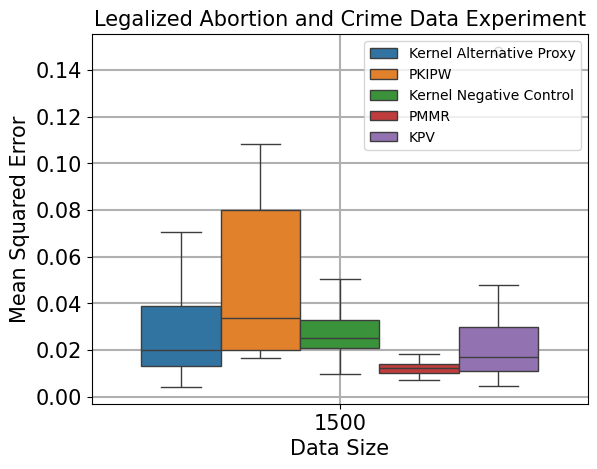

In [11]:
df_kernel_alternative_proxy_results = df_kernel_alternative_proxy.loc[df_kernel_alternative_proxy['scale_data'] == True]
df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] == 'learned']
df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_alternative_proxy_results_eta_fixed = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] != 'learned']
df_kernel_alternative_proxy_results_eta_fixed['Algorithm'] = 'Kernel Alternative Proxy (fixed eta)'
df_PKIPW_results = df_PKIPW.loc[df_PKIPW['scale_data'] == True]
df_kernel_negative_control_results = df_kernel_negative_control.loc[df_kernel_negative_control['scale_data'] == True]
df_PMMR_results = df_PMMR.loc[df_PMMR['scale_data'] == True]
df_KPV_results = df_KPV.loc[df_KPV['scale_data'] == True]
df_kernel_negative_control_results['Algorithm'] = 'Kernel Negative Control'

df_results = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
                        # df_kernel_alternative_proxy_results_eta_fixed,
                        df_PKIPW_results,
                        df_kernel_negative_control_results, 
                        df_PMMR_results,
                        df_KPV_results, 
                      ],
                      axis = 0)

SetPlotRC()
sns.boxplot(data=df_results[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("Legalized Abortion and Crime Data Experiment", fontsize=10)
plt.grid(linewidth=1.5)
plt.legend(loc = 'upper right')
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
plt.savefig('Figures/Alternative_Proxy_ATE_ComplexityRegularized_Abortion&Crime_Comparison.pdf', format='pdf', bbox_inches = 'tight')
plt.show()